# Layer Explaination

In [1]:
import tensorflow as tf

## Input Image  
Input으로 들어갈 DataSet을 들여다보면서 시각화까지

패키지 로드  
- os
- glob
- matplotlib

In [2]:
import os

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from tensorflow.keras import datasets

(train_x, train_y), (test_x, test_y) = datasets.mnist.load_data()

In [4]:
image = train_x[0]

In [5]:
# 이미지 shape 확인
image.shape

(28, 28)

In [6]:
# 차원 수 높이기 
image = image[tf.newaxis, ..., tf.newaxis]

In [7]:
image.shape

(1, 28, 28, 1)

# Feature Extraction

## Convolution

- filters: layer에서 나갈 때 몇 개의 filter를 만들 것인지 (a.k.a weights, filters, channels)  
- kernel_size: filter(Weight)의 사이즈  
- strides: 몇 개의 pixel을 skip 하면서 훑어지나갈 것인지 (사이즈에도 영향을 줌)  
- padding: zero padding을 만들 것인지. VALID는 Padding이 없고, SAME은 Padding이 있음 (사이즈에도 영향을 줌)  
- activation: Activation Function을 만들것인지. 당장 설정 안해도 Layer층을 따로 만들 수 있음

In [8]:
tf.keras.layers.Conv2D(filters=3, kernel_size=(3, 3), strides=(1, 1), padding='VALID', activation='relu')

(3, 3) 대신에 3으로도 대체 가능

In [9]:
tf.keras.layers.Conv2D(filters=3, kernel_size=3, strides=(1, 1), padding='VALID', activation='relu')

### Visualization

- tf.keras.layers.Conv2D

In [10]:
image = tf.cast(image, dtype=tf.float32)

In [11]:
layer = tf.keras.layers.Conv2D(3, 3, strides=(1, 1), padding='SAME')
output = layer(image)

weight 불러오기

- layer.get_weights()

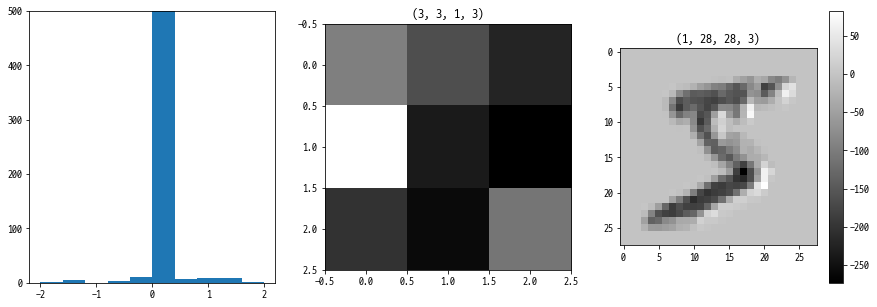

In [12]:
weight = layer.get_weights()[0]

plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.hist(output.numpy().ravel(), range=[-2,2])
plt.ylim(0, 500)
plt.subplot(132)
plt.title(weight.shape)
plt.imshow(weight[:,:,0,0], 'gray')
plt.subplot(133)
plt.title(output.shape)
plt.imshow(output[0, :, :, 0], 'gray')
plt.colorbar()
plt.show()

## Activation Function

In [13]:
# out = tf.keras.layers.Conv2D(3, 3, strides=(1, 1), padding='SAME')(out)
layer = tf.keras.layers.ReLU()
output = layer(output)

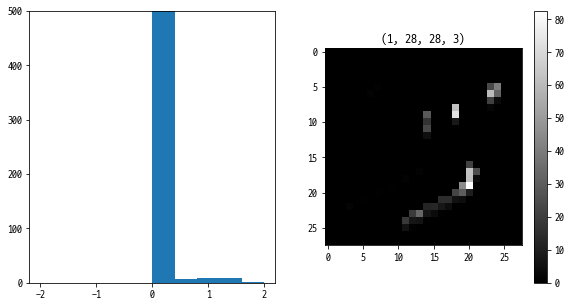

In [14]:
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.hist(output.numpy().ravel(), range=[-2,2])
plt.ylim(0, 500)
plt.subplot(132)
plt.title(output.shape)
plt.imshow(output[0, :, :, 0], 'gray')
plt.colorbar()
plt.show()

## Pooling

- tf.keras.layers.MaxPool2D

In [15]:
tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='SAME')

In [16]:
layer = tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='SAME')
output = layer(output)

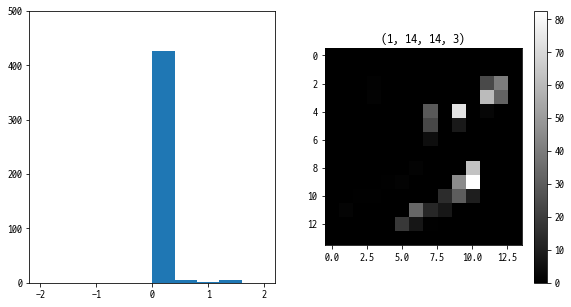

In [17]:
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.hist(output.numpy().ravel(), range=[-2,2])
plt.ylim(0, 500)
plt.subplot(132)
plt.title(output.shape)
plt.imshow(output[0, :, :, 0], 'gray')
plt.colorbar()
plt.show()

In [18]:
layer = tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='SAME')
output = layer(output)

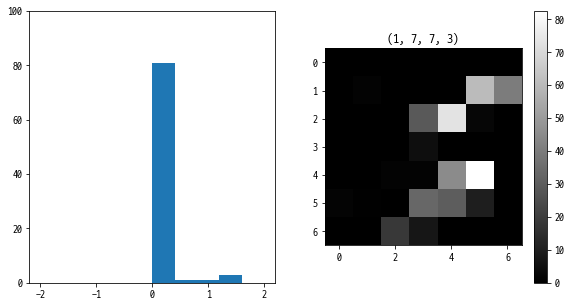

In [19]:
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.hist(output.numpy().ravel(), range=[-2,2])
plt.ylim(0, 100)
plt.subplot(132)
plt.title(output.shape)
plt.imshow(output[0, :, :, 0], 'gray')
plt.colorbar()
plt.show()

# Fully Connected

## Flatten

- tf.keras.layers.Flatten()

In [20]:
tf.keras.layers.Flatten()

In [21]:
layer = tf.keras.layers.Flatten()
output = layer(output)

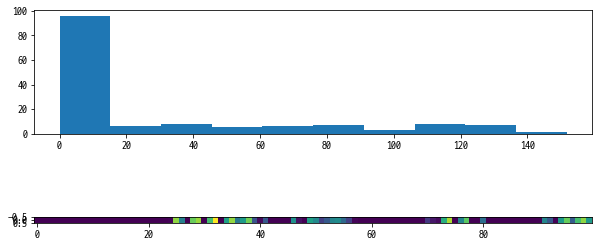

In [22]:
plt.figure(figsize=(10, 5))
plt.subplot(211)
plt.hist(output.numpy().ravel())
plt.subplot(212)
plt.imshow(output[:,:100])
plt.show()

## Dense

- tf.keras.layers.Dense

In [23]:
tf.keras.layers.Dense(32, activation='relu')

In [24]:
layer = tf.keras.layers.Dense(32, activation='relu')
output = layer(output)

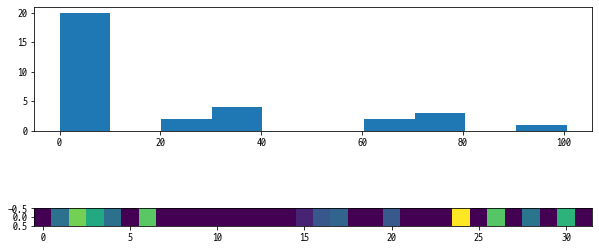

In [25]:
plt.figure(figsize=(10, 5))
plt.subplot(211)
plt.hist(output.numpy().ravel())
plt.subplot(212)
plt.imshow(output[:,:100])
plt.show()

## DropOut

- tf.keras.layers.Dropout

In [26]:
layer = tf.keras.layers.Dropout(0.7)
output = layer(output)

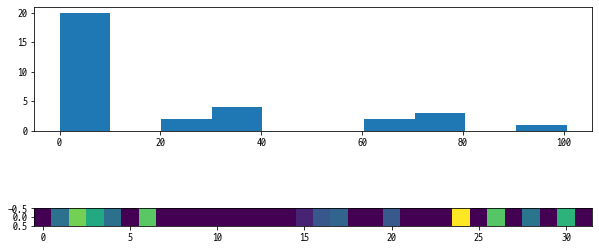

In [27]:
plt.figure(figsize=(10, 5))
plt.subplot(211)
plt.hist(output.numpy().ravel())
plt.subplot(212)
plt.imshow(output[:,:100])
plt.show()

# Build Model

In [28]:
from tensorflow.keras import layers

In [29]:
input_shape = (28, 28, 1)
num_classes = 10

In [30]:
inputs = layers.Input(input_shape)
net = layers.Conv2D(32, (3, 3), padding='SAME')(inputs)
net = layers.Activation('relu')(net)
net = layers.Conv2D(32, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(0.25)(net)

net = layers.Conv2D(64, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.Conv2D(64, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(0.25)(net)

net = layers.Flatten()(net)
net = layers.Dense(512)(net)
net = layers.Activation('relu')(net)
net = layers.Dropout(0.5)(net)
net = layers.Dense(num_classes)(net)
net = layers.Activation('softmax')(net)

model = tf.keras.Model(inputs=inputs, outputs=net, name='Basic_CNN')

## Summary

In [31]:
model.summary()

Model: "Basic_CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 activation (Activation)     (None, 28, 28, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                         